In [1]:
import numpy as np
import xarray as xr
from pyfunctions import *
import cartopy.crs as ccrs

### import some analysis functions we wrote for this project
import sys ; sys.path.append("../") ; sys.path.append("../../") 
from ppe_analysis.analysis import *

In [2]:
# Setup your PBSCluster
import dask
from dask_jobqueue import PBSCluster
from dask.distributed import Client
ncores=1
nmem='10GB'
cluster = PBSCluster(
    cores=ncores, # The number of cores you want
    memory=nmem, # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus='+str(ncores)+':mem='+nmem, # Specify resources
    project='P93300641', # Input your project ID here
    walltime='01:00:00', # Amount of wall time
    #interface='ib0', # Interface to use
)

# Scale up
cluster.scale(10)

# Setup your client
client = Client(cluster)

/glade/u/home/linnia/miniconda3/envs/ppe-py/lib/python3.7/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [3]:
# Load Default CLM 'h0'
def get_map(da,sgmap=None):
    if not sgmap:
        sgmap=xr.open_dataset('sgmap.nc')
    return da.sel(gridcell=sgmap.cclass).where(sgmap.notnan).compute()

In [4]:
ds_h0=get_exp('transient',dvs=['TLAI','GPP'],tape='h0',yy=(2001,2010))

### GPP

In [ ]:
scaler = 60*60*24

def_gpp = ds_h0.GPP.sel(ens=0)
def_gpp_am = amean(def_gpp).mean(dim='year')
def_gpp_map = get_map(def_gpp_am)
default_gpp_map = def_gpp_map*scaler

In [ ]:
# plot all observational datasets
t=slice(str(2001),str(2010))
in_file = '/glade/work/linnia/datasets/FLUXCOM/FLUXCOM-RS_regridded_2deg_bilinear/FLUXCOM-RS_GPP_FR-ALL_MLM-ALL_2degbilinear_monthly_2001-2015.nc'
F_ds = xr.open_dataset(in_file)
RS = amean(F_ds['GPP'].sel(time=t)).mean(dim='year').compute()

in_dir = '/glade/work/linnia/datasets/FLUXCOM/FLUXCOM-RS_METEO_regridded_2deg_bilinear/'
in_file = in_dir + 'FLUXCOM-RS_METEO-CERES_GPCP_GPP_FP-ALL_MLM-ALL_2degbilinear_monthly_2001-2014.nc'
F_ds = xr.open_dataset(in_file)
CERES = amean(F_ds['GPP'].sel(time=t)).mean(dim='year').compute()

in_file = in_dir + 'FLUXCOM-RS_METEO-CRUJRA_v1_GPP_FP-ALL_MLM-ALL_2degbilinear_monthly_1950-2017.nc'
F_ds = xr.open_dataset(in_file)
CRU = amean(F_ds['GPP'].sel(time=t)).mean(dim='year').compute()

in_file = in_dir + 'FLUXCOM-RS_METEO-ERA5_GPP_FP-ALL_MLM-ALL_2degbilinear_monthly_1979-2018.nc'
F_ds = xr.open_dataset(in_file)
ERA5 = amean(F_ds['GPP'].sel(time=t)).mean(dim='year').compute()

in_file = in_dir + 'FLUXCOM-RS_METEO-GSWP3_GPP_FP-ALL_MLM-ALL_2degbilinear_monthly_1950-2010.nc'
F_ds = xr.open_dataset(in_file)
GSWP3 = amean(F_ds['GPP'].sel(time=t)).mean(dim='year').compute()

in_file = in_dir + 'FLUXCOM-RS_METEO-WFDEI_GPP_FP-ALL_MLM-ALL_2degbilinear_monthly_1979-2013.nc'
F_ds = xr.open_dataset(in_file)
WFDEI = amean(F_ds['GPP'].sel(time=t)).mean(dim='year').compute()


In [ ]:
plt.figure(figsize=(12, 12))
crs = ccrs.PlateCarree()

ax = plt.subplot(3,2,1,projection=crs)
RS.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('FLUXCOM-RS')

ax = plt.subplot(3,2,2,projection=crs)
CRU.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('FLUXCOM-CRUJRA')

ax = plt.subplot(3,2,3,projection=crs)
CERES.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('FLUXCOM-CERES-GPCP')

ax = plt.subplot(3,2,4,projection=crs)
ERA5.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('FLUXCOM-ERA5')

ax = plt.subplot(3,2,5,projection=crs)
GSWP3.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('FLUXCOM-GSWP3')

ax = plt.subplot(3,2,6,projection=crs)
WFDEI.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('FLUXCOM-WFDEI')

plt.savefig(str('FLUXCOM_GPP_2001-2010.png'),dpi=100)

In [ ]:
# plot CLM-Default bias

plt.figure(figsize=(30, 5))
crs = ccrs.PlateCarree()

ax = plt.subplot(1,3,1,projection=crs)
GSWP3.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('FLUXCOM mean')

ax = plt.subplot(1,3,2,projection=crs)
default_gpp_map.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0,vmax=9, cmap='Greens')
ax.coastlines()
plt.title('CLM5.1 default')

ax = plt.subplot(1,3,3,projection=crs)
diff = (default_gpp_map - FLUXCOM_GSWP3_GPP)
diff.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = -4,vmax=4, cmap='RdBu_r')
ax.coastlines()
plt.title('CLM5.1 bias')

plt.savefig(str('./figs/GPPbias_FLUXCOM-RS-GSWP3_CLM5.1default_2001-2010.png'),dpi=200)

### LAI

In [6]:
def_lai = ds_h0.TLAI.sel(ens=0)
def_lai_am = amax(def_lai).mean(dim='year')
default_lai_map = get_map(def_lai_am)

In [41]:
# CLM-SP LAI 
la = get_la()
SP_sg = get_SP('h0')
SP_BM = bmean(amax(SP_sg).mean(dim='year'),la).compute()

In [38]:
ds_sp=xr.open_dataset('/glade/scratch/linnia/archive/LAI_SP_ctsm51d115/lnd/hist/LAI_SP_ctsm51d115.clm2.h0.2000-02-01-00000.nc')
ds_sp['time']=xr.cftime_range('2000',periods=12,freq='MS',calendar='noleap')
CLM_SP = amax(ds_sp.TLAI).mean(dim='year')

In [8]:
# Satellite products
t=slice(str(2003),str(2007))
in_file = '/glade/work/linnia/datasets/GIMMS_LAI4g/GIMMS_LAI4g_V1.2_regridded/GIMMS_LAI4g_V1.2_2deg_1982-2020.nc'
obs_ds = xr.open_dataset(in_file)
GIMMS = amax(obs_ds.sel(time=t)).mean(dim='year').compute()
GIMMS_BM = get_obs_bmean(in_file,2003,2007,'__xarray_dataarray_variable__',max=True)

in_file = '/glade/work/linnia/datasets/GLOBMAP/GlobMapLAIV3_regridded/GlobMapLAIV3_2deg_2001-2020.nc'
obs_ds = xr.open_dataset(in_file)
GLOBMAP = amax(obs_ds.sel(time=t)).mean(dim='year').compute()
GLOBMAP_BM = get_obs_bmean(in_file,2003,2007,'__xarray_dataarray_variable__',max=True)

in_file = '/glade/work/linnia/ILAMB/ilamb_data/regridded/AVHRR_LAI_regridded.nc'
ds_obs = xr.open_dataset(in_file)
AVHRR = amax(ds_obs.sel(time=t)).mean(dim='year').compute()
AVHRR_BM = get_obs_bmean(in_file,2003,2007,'AVHRR_LAI',max=True)


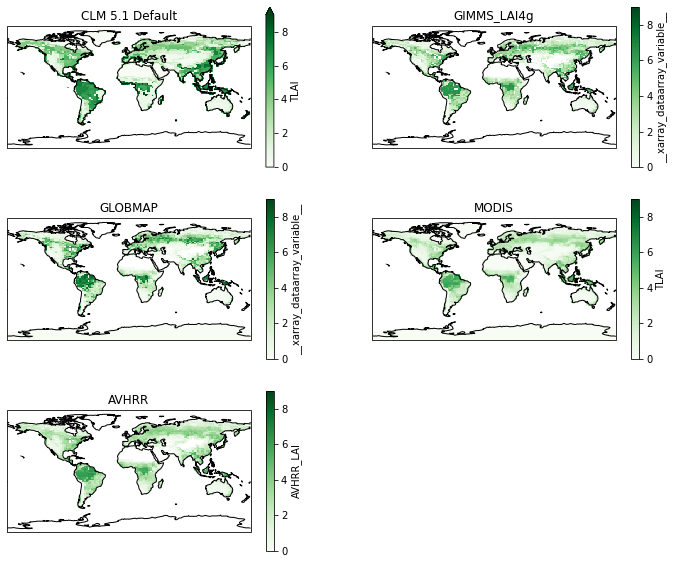

In [50]:
plt.figure(figsize=(12, 10))
crs = ccrs.PlateCarree()

ax = plt.subplot(3,2,1,projection=crs)
default_lai_map.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('CLM 5.1 Default')

ax = plt.subplot(3,2,2,projection=crs)
GIMMS.__xarray_dataarray_variable__.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('GIMMS_LAI4g')

ax = plt.subplot(3,2,3,projection=crs)
GLOBMAP.__xarray_dataarray_variable__.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('GLOBMAP')

ax = plt.subplot(3,2,4,projection=crs)
CLM_SP.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('MODIS')

ax = plt.subplot(3,2,5,projection=crs)
AVHRR.AVHRR_LAI.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=9,cmap='Greens')
ax.coastlines()
plt.title('AVHRR')

plt.savefig('./figs/LAI_obs_2003-2007.png',dpi=100)

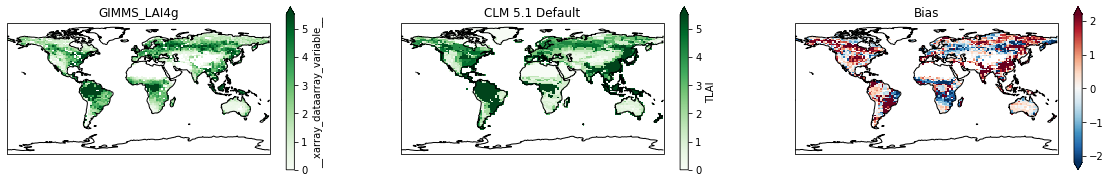

In [55]:
plt.figure(figsize=(20, 3))

crs = ccrs.PlateCarree()
ax = plt.subplot(1,3,1,projection=crs)
GIMMS.__xarray_dataarray_variable__.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=5.5,cmap='Greens')
ax.coastlines()
plt.title('GIMMS_LAI4g')

ax = plt.subplot(1,3,2,projection=crs)
default_lai_map.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=5.5,cmap='Greens')
ax.coastlines()
plt.title('CLM 5.1 Default')

ax = plt.subplot(1,3,3,projection=crs)
diff = default_lai_map - GIMMS.__xarray_dataarray_variable__
diff.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = -2.2, vmax=2.2,cmap='RdBu_r')
ax.coastlines()
plt.title('Bias')

plt.savefig('./figs/LAI_bias_2003-2007_GIMMS.png',dpi=100)

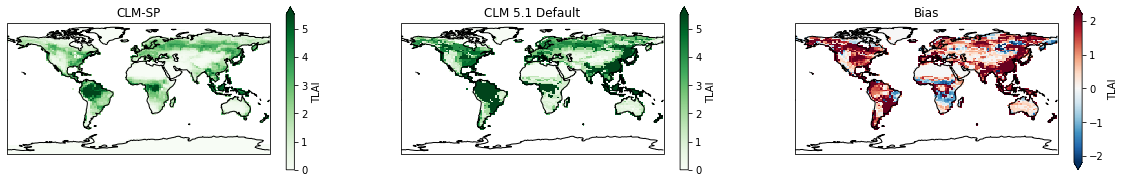

In [54]:
plt.figure(figsize=(20, 3))

crs = ccrs.PlateCarree()
ax = plt.subplot(1,3,1,projection=crs)
CLM_SP.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=5.5,cmap='Greens')
ax.coastlines()
plt.title('CLM-SP')

ax = plt.subplot(1,3,2,projection=crs)
default_lai_map.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=5.5,cmap='Greens')
ax.coastlines()
plt.title('CLM 5.1 Default')

ax = plt.subplot(1,3,3,projection=crs)
diff = default_lai_map - CLM_SP
diff.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = -2.2, vmax=2.2,cmap='RdBu_r')
ax.coastlines()
plt.title('Bias')

plt.savefig('./figs/LAI_bias_2003-2007_CLM_SP.png',dpi=100)

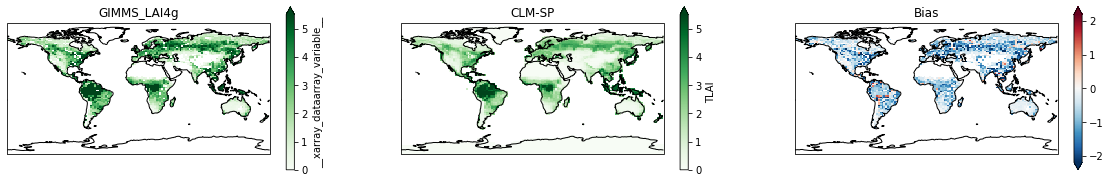

In [56]:
plt.figure(figsize=(20, 3))

crs = ccrs.PlateCarree()

ax = plt.subplot(1,3,1,projection=crs)
GIMMS.__xarray_dataarray_variable__.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=5.5,cmap='Greens')
ax.coastlines()
plt.title('GIMMS_LAI4g')

ax = plt.subplot(1,3,2,projection=crs)
CLM_SP.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = 0, vmax=5.5,cmap='Greens')
ax.coastlines()
plt.title('CLM-SP')

ax = plt.subplot(1,3,3,projection=crs)
diff = CLM_SP - GIMMS.__xarray_dataarray_variable__
diff.plot.pcolormesh(ax=ax, x="lon", y="lat",vmin = -2.2, vmax=2.2,cmap='RdBu_r')
ax.coastlines()
plt.title('Bias')

plt.savefig('./figs/LAI_bias_2003-2007_CLM_SP-GIMMS.png',dpi=100)

### Select important PXBs

In [39]:
# Define PxB "ecoregions"
# Excluding PFT7 biome 2 & 3 and PFT10 biome 2 & 3 (lots of zeros)
pb_priority = {}
pb_priority[pft_names[1]] = [5,6]
pb_priority[pft_names[2]] = [8]
pb_priority[pft_names[3]] = [9]
pb_priority[pft_names[4]] = [1,2]
pb_priority[pft_names[5]] = []
pb_priority[pft_names[6]] = [2]
pb_priority[pft_names[7]] = [5]
pb_priority[pft_names[8]] = []
pb_priority[pft_names[9]] = []
pb_priority[pft_names[10]] = []
pb_priority[pft_names[11]] = [9]
pb_priority[pft_names[12]] = [8,9] 
pb_priority[pft_names[13]] = [2,5,6]
pb_priority[pft_names[14]] = [1,2,3] 
pb_priority[pft_names[15]] = [2,5,6]
pb_priority[pft_names[16]] = []
np.save('pb_priority.npy', pb_priority) 